电商18 180412126 王佳琦

本次作业主要参考ppt上的代码。

## 1. 结巴分词

In [9]:
import jieba
novel = open("data/weilai.txt",encoding='utf8')  #打开小说文件
content=novel.read()   #读入content
novel_segmented = open("data/weilai.txt",'w',encoding='utf8') #打开小说文件写入
cutword = jieba.cut(content,cut_all=False)  #用jieba分词
seg = ' '.join(cutword).replace(',','').replace('。','').replace('“','').replace('”','').replace('：','').replace('…','')\
.replace('！','').replace('？','').replace('~','').replace('（','').replace('）','').replace('、','').replace('；','')
#用空格替代标点符号
print(seg,file=novel_segmented)  #写入文件中
novel.close()
novel_segmented.close()

成功，但是序言里有一些用中文标点没有去掉，手动剔除了序言。

## 2. 生成词向量

新版的Word2vec里边一些具体的参数进行了更新，ppt上的有些代码需要修改

In [10]:
from gensim.models import word2vec 
# 训练word2vec模型，生成词向量
s = word2vec.LineSentence("data/weilai.txt") 
model = word2vec.Word2Vec(s,vector_size=20,window=5,min_count=5,workers=4) #这里报错了，应该将size改为vector_size 
model.save('data/weilai-model.txt')

In [7]:
print(model.wv["母亲"]) #按照ppt上的会报错，改为model.wv, 这里在查看母亲一词的词向量

[-0.14484866 -0.06255465  0.3554679   1.0504673  -0.1083938  -0.4880837
  0.3069894   1.5601417  -0.9883444  -0.14853297  0.08241063 -0.04487623
  0.2713236  -0.49248728  0.6478348   0.39920527  0.82908833 -0.53802115
 -0.73221594 -0.9272503 ]


In [8]:
print(model.wv["戈万"])

[-0.04358432 -0.24326962  0.23474896  1.0135294  -0.28137597 -1.0589243
  0.49230903  2.1761746  -1.6348518  -0.3193851   0.07020079  0.02526241
  0.6041571  -0.6393919   0.37753528  0.64635277  1.1158957  -0.71854043
 -1.2507447  -0.6612338 ]


In [9]:
print("法国和共和国：",model.wv.similarity("法国","共和国"))  #新版的Word2vec里边一些具体的参数进行了更新

法国和共和国： 0.9966819


相似度果然很高，好神奇呀。

In [10]:
print("戈万和共和国：",model.wv.similarity("戈万","共和国"))
print("戈万和朗特纳克：",model.wv.similarity("戈万","特纳"))
print("戈万和西穆尔登：",model.wv.similarity("戈万","穆尔"))

戈万和共和国： 0.9732219
戈万和朗特纳克： 0.6789012
戈万和西穆尔登： 0.75194263


In [11]:
print("朗特纳克和共和国：",model.wv.similarity("特纳","共和国"))
print("西穆尔登和共和国：",model.wv.similarity("穆尔","共和国"))

朗特纳克和共和国： 0.647529
西穆尔登和共和国： 0.6036215


戈万代表了理想的共和国！

In [12]:
print("男孩和女孩：",model.wv.similarity("男孩","女孩"))

男孩和女孩： 0.73029995


以下使用ppt未展示的方法：

In [11]:
model.wv.most_similar(['蔚来'])

[('小鹏', 0.7439371943473816),
 ('威马', 0.7207439541816711),
 ('游侠', 0.699495255947113),
 ('江淮', 0.6814382672309875),
 ('进展', 0.6736200451850891),
 ('此次', 0.6660267114639282),
 ('继蔚来', 0.6598472595214844),
 ('对外', 0.6587114930152893),
 ('尽管', 0.6510295867919922),
 ('李斌', 0.6446170806884766)]

In [14]:
model.wv.most_similar(['戈万'])

[('公民', 0.9906713962554932),
 ('的确', 0.9884918928146362),
 ('学生', 0.988250732421875),
 ('严肃', 0.9871174097061157),
 ('留下', 0.9870557188987732),
 ('同意', 0.9870227575302124),
 ('下令', 0.9859371781349182),
 ('负责', 0.9854331016540527),
 ('神甫', 0.9848761558532715),
 ('片刻', 0.9848623871803284)]

In [15]:
model.wv.most_similar(['穆尔'])

[('丹', 0.9610327482223511),
 ('西', 0.9506075978279114),
 ('丹说', 0.9020037651062012),
 ('丹是', 0.8891741037368774),
 ('喜爱', 0.8206691145896912),
 ('提升', 0.7858110070228577),
 ('戈万', 0.7519425749778748),
 ('敬礼', 0.751797080039978),
 ('伸出手', 0.7425513863563538),
 ('反驳', 0.7371588349342346)]

In [16]:
model.wv.most_similar(['特纳'])

[('克', 0.9749863147735596),
 ('朗', 0.9686976075172424),
 ('德', 0.9598821997642517),
 ('·', 0.9493263959884644),
 ('克是', 0.8953396081924438),
 ('菲利浦', 0.8830273151397705),
 ('计划', 0.8719897866249084),
 ('候爵', 0.8670735955238342),
 ('弗莱', 0.8608382940292358),
 ('米歇尔', 0.8597633838653564)]

In [17]:
model.wv.most_similar(['法国'])

[('而且', 0.9981468319892883),
 ('沟壑', 0.9981228113174438),
 ('还是', 0.9980250597000122),
 ('圣', 0.9979751110076904),
 ('后', 0.997951328754425),
 ('三', 0.9979488849639893),
 ('国王', 0.9979424476623535),
 ('成为', 0.9979331493377686),
 ('给', 0.9979297518730164),
 ('①', 0.9978802800178528)]

In [18]:
model.wv.most_similar(['女贩'])

[('稍稍', 0.990559458732605),
 ('与此同时', 0.9897295236587524),
 ('老板', 0.9896223545074463),
 ('听', 0.9891335368156433),
 ('说', 0.9890148043632507),
 ('不久', 0.988472580909729),
 ('拉维厄', 0.9879624843597412),
 ('老爷', 0.9877276420593262),
 ('盖', 0.9872545599937439),
 ('找', 0.9872438907623291)]

## 3. 生成词云图

(-0.5, 399.5, 199.5, -0.5)

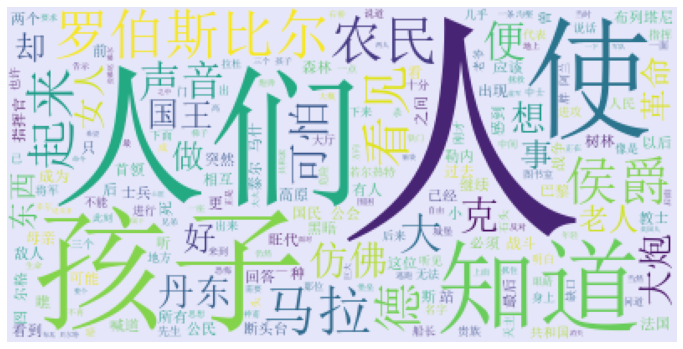

In [29]:
from wordcloud import WordCloud

import matplotlib.pyplot as plt
text = open("data/hugo.txt",encoding='utf8').read()

text = text.replace('n',"").replace("u3000","")
# 分词，返回结果为词的列表

text_cut = jieba.lcut(text)

# 将分好的词用某个符号分割开连成字符串

text_cut = ' '.join(text_cut)
text_cut
stop_words = open("data/stopwords-master/jiaqi.txt",encoding="utf8").read().split("\n") #用我添加的停词表
word_cloud = WordCloud(font_path="simsun.ttc", # 设置词云字体

background_color="#e6e6fa", # 词云图的背景颜色

stopwords=stop_words) # 去掉的停词

word_cloud.generate(text_cut)

# 运用matplotlib展现结果

plt.subplots(figsize=(12,8))

plt.imshow(word_cloud)

plt.axis("off")